**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)    
  - 2.1. [Basic Edgeworth box](#toc2_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 1. <a id='toc1_'></a>[Imports](#toc0_)

In [116]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## 2. <a id='toc2_'></a>[Model class](#toc0_)

In [117]:
from ExchangeEconomy import ExchangeEconomyClass

### 2.1. <a id='toc2_1_'></a>[Basic Edgeworth box](#toc0_)

In [118]:
model = ExchangeEconomyClass()
N=100


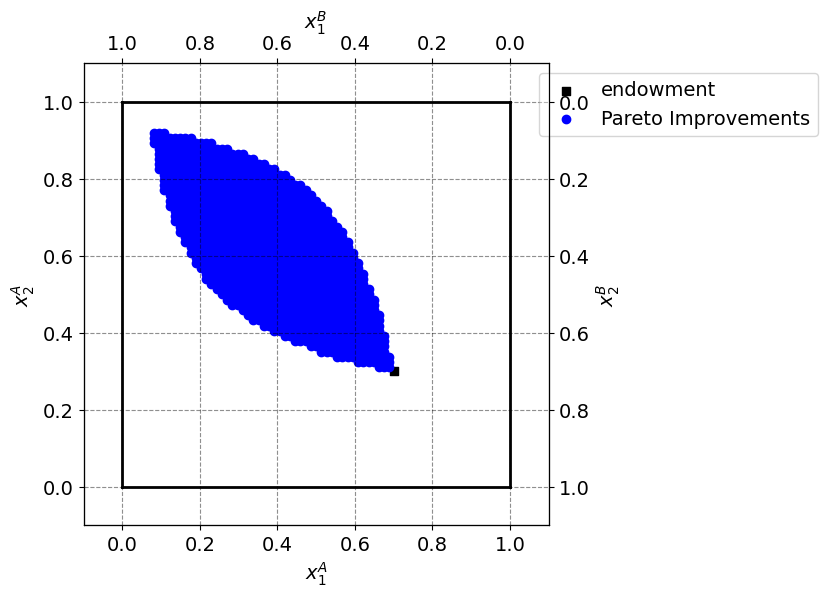

In [119]:
# Corrected code based on the provided snippet for the assignment

import matplotlib.pyplot as plt
from types import SimpleNamespace
from scipy import optimize
import numpy as np

# Update matplotlib settings for grid and font size
plt.rcParams.update({
    "axes.grid": True,
    "grid.color": "black",
    "grid.alpha": 0.25,
    "grid.linestyle": "--"
})
plt.rcParams.update({'font.size': 14})


# Example of using the model class and plotting the Edgeworth box
model = ExchangeEconomyClass()

# Setup for Edgeworth box plot
par = model.par

# Grid seacrh

# Define the grid
N = 75  # Number of points in each dimension
x1A_grid = np.linspace(0, par.w1A + par.w1B, N)
x2A_grid = np.linspace(0, par.w2A + par.w2B, N)

# Prepare for Pareto improvement search
pareto_improvements = []

# Initial utilities with endowments
initial_utility_A = model.utility_A(par.w1A, par.w2A)
initial_utility_B = model.utility_B(par.w1B, par.w2B)

# Grid search for Pareto improvements
for x1A in x1A_grid:
    for x2A in x2A_grid:
        # Calculate remaining goods for B
        x1B = par.w1A + par.w1B - x1A
        x2B = par.w2A + par.w2B - x2A
        
        # Ensure allocations are non-negative
        if x1B >= 0 and x2B >= 0:
            utility_A = model.utility_A(x1A, x2A)
            utility_B = model.utility_B(x1B, x2B)
            
            # Check for Pareto improvement
            if utility_A >= initial_utility_A and utility_B >= initial_utility_B:
                pareto_improvements.append((x1A, x2A))

# Total endowment
w1bar = 1.0
w2bar = 1.0

# Figure setup
fig = plt.figure(frameon=False, figsize=(6, 6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# Plotting endowment for A
ax_A.scatter(par.w1A, par.w2A, marker='s', color='black', label='endowment')

# Plot limits
w1bar = 1.0
w2bar = 1.0

ax_A.plot([0, w1bar], [0, 0], lw=2, color='black')
ax_A.plot([0, w1bar], [w2bar, w2bar], lw=2, color='black')
ax_A.plot([0, 0], [0, w2bar], lw=2, color='black')
ax_A.plot([w1bar, w1bar], [0, w2bar], lw=2, color='black')

# Adding Pareto improvements scatter plot
ax_A.scatter(np.array(pareto_improvements)[:, 0], np.array(pareto_improvements)[:, 1], color='blue', label='Pareto Improvements')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True, loc='upper right', bbox_to_anchor=(1.6, 1.0))

plt.show()



In [120]:
import pandas as pd


N = 75
increments = np.array(range(N)) / N
p1_prices = 0.5 + 2*increments
# Initialize lists to store the values of eps1 and eps2
eps1_values = []
eps2_values = []

# Calculate eps1 and eps2 for each price in p1_prices
for p1 in p1_prices:
    eps1, eps2 = model.check_market_clearing(p1)
    eps1_values.append(eps1)
    eps2_values.append(eps2)

df = pd.DataFrame({
    'p1': p1_prices,
    'eps1': eps1_values,
    'eps2': eps2_values
})

# Print the DataFrame
print(df)

          p1      eps1      eps2
0   0.500000  0.566667 -0.566667
1   0.526667  0.509283 -0.509283
2   0.553333  0.457430 -0.457430
3   0.580000  0.410345 -0.410345
4   0.606667  0.367399 -0.367399
..       ...       ...       ...
70  2.366667 -0.327230  0.327230
71  2.393333 -0.329898  0.329898
72  2.420000 -0.332507  0.332507
73  2.446667 -0.335059  0.335059
74  2.473333 -0.337556  0.337556

[75 rows x 3 columns]


In [123]:
#Spørgsmål 3
import pandas as pd
import numpy as np

# Your final code structure for calculating eps1 and eps2
N = 75
increments = np.array(range(N)) / N
p1_prices = 0.5 + 2*increments
eps1_values = []
eps2_values = []

# Assuming 'model' is an instance of your ExchangeEconomyClass with the correct check_market_clearing method
for p1 in p1_prices:
    eps1, eps2 = model.check_market_clearing(p1)
    eps1_values.append(eps1)
    eps2_values.append(eps2)

df = pd.DataFrame({
    'p1': p1_prices,
    'eps1': eps1_values,
    'eps2': eps2_values
})

# New addition: Finding the market-clearing price
df['abs_sum_eps'] = abs(df['eps1']) + abs(df['eps2'])
min_eps_row = df.loc[df['abs_sum_eps'].idxmin()]
market_clearing_price = min_eps_row['p1']
print(f"The market-clearing price is approximately: {market_clearing_price}")


The market-clearing price is approximately: 1.0066666666666668


In [127]:
#Spørgsmål 4a
import scipy.optimize

# Given calibration values
alpha = 1 / 3
beta = 2 / 3

# Initial endowments for A and B
omega_A1 = 0.8
omega_A2 = 0.3
omega_A = [omega_A1, omega_A2]
omega_B = [1 - omega_A1, 1 - omega_A2]

# Define the utility functions for players A and B

# Define the demand functions for player A
def demand_A_x1(p1, omega_A):
    return (alpha * (p1 * omega_A[0] + omega_A[1])) / p1

def demand_A_x2(p1, omega_A):
    return ((1 - alpha) * (p1 * omega_A[0] + omega_A[1]))

# Define the demand functions for player B
def demand_B_x1(p1, omega_B):
    return (beta * (p1 * omega_B[0] + omega_B[1])) / p1

def demand_B_x2(p1, omega_B):
    return ((1 - beta) * (p1 * omega_B[0] + omega_B[1]))

# Market clearing condition, p2 is numeraire and set to 1
def market_clearing_condition(p1):
    total_demand_x1 = demand_A_x1(p1, omega_A) + demand_B_x1(p1, omega_B)
    total_supply_x1 = omega_A[0] + omega_B[0]
    # Return the difference between total demand and supply for good 1
    return total_demand_x1 - total_supply_x1

# Use a numerical solver to find the price p1 that clears the market
initial_guess_p1 = 1
p1_star = scipy.optimize.fsolve(market_clearing_condition, initial_guess_p1)[0]  # Get the first element of the result

# Calculate the equilibrium allocations for goods 1 and 2 for both players
x1_star_A = demand_A_x1(p1_star, omega_A)
x2_star_A = demand_A_x2(p1_star, omega_A)
x1_star_B = demand_B_x1(p1_star, omega_B)
x2_star_B = demand_B_x2(p1_star, omega_B)

# Assuming N for granularity of price range
N = 75  # This can be adjusted as needed

# Generate the set P1 for possible values of p1
P1 = [0.5 + i/N for i in range(int(N * (2.5 - 0.5)) + 1)]

# Function to calculate the utility of player A given price p1
def utility_of_A_given_p1(p1):
    # Calculate player B's allocations assuming p2 = 1 (numeraire)
    x1_B = demand_B_x1(p1, omega_B)
    x2_B = demand_B_x2(p1, omega_B)

    # Ensure non-negative allocations for player A
    x1_A = max(omega_A[0] + omega_B[0] - x1_B, 0)
    x2_A = max(omega_A[1] + omega_B[1] - x2_B, 0)

    # If any allocation for A is zero, utility is zero
    if x1_A == 0 or x2_A == 0:
        return 0

    # Return the utility value for player A
    return utility_A(x1_A, x2_A)

# Find the p1 that maximizes utility for player A
max_utility = float('-inf')
optimal_p1 = None
for p1 in P1:
    current_utility = utility_of_A_given_p1(p1)
    # Check for maximum utility and update if current utility is greater
    if current_utility > max_utility:
        max_utility = current_utility
        optimal_p1 = p1

# Output the optimal price p1 and the corresponding utility
optimal_p1, max_utility


(1.9, 0.6336208378614051)

In [138]:
#spørgsmål 4b

# Adjusted P1 with only the restriction of being positive
max_p1 = 100  # Define a sensible upper limit for the price of good 1
min_value = 0.01  # Starting value for P1, close to zero but positive
step_size = 0.01  # Increment step for P1, defining granularity

# Generate the set P1 for possible values of p1
P12 = [min_value + i * step_size for i in range(int((max_p1 - min_value) / step_size))]

# Function to calculate the utility of player A given price p1
def utility_of_A_given_p1(p1):
    # Calculate player B's allocations assuming p2 = 1 (numeraire)
    x1_B = demand_B_x1(p1, omega_B)
    x2_B = demand_B_x2(p1, omega_B)

    # Ensure non-negative allocations for player A
    x1_A = max(omega_A[0] + omega_B[0] - x1_B, 0)
    x2_A = max(omega_A[1] + omega_B[1] - x2_B, 0)

    # If any allocation for A is zero, utility is zero
    if x1_A == 0 or x2_A == 0:
        return 0

    # Return the utility value for player A
    return utility_A(x1_A, x2_A)

# Find the p1 that maximizes utility for player A
max_utility = float('-inf')
optimal_p1 = None
for p1 in P12:
    current_utility = utility_of_A_given_p1(p1)
    # Check for maximum utility and update if current utility is greater
    if current_utility > max_utility:
        max_utility = current_utility
        optimal_p1 = p1

# Output the optimal price p1 and the corresponding utility
optimal_p1, max_utility

(1.9000000000000001, 0.6336208378614051)

In [9]:
#Spørgsmål 5a
import scipy.optimize
import numpy as np

# Given calibration values
alpha = 1 / 3
beta = 2 / 3

# Initial endowments for A and B
omega_A = [0.8, 0.3]
omega_B = [1 - omega_A[0], 1 - omega_A[1]]

# Utility functions
def utility_A(x1, x2):
    if x1 <= 0 or x2 <= 0:
        return float('-inf')  # Return negative infinity if inputs are non-positive
    else:
        return (x1 ** alpha) * (x2 ** (1 - alpha))

def utility_B(x1, x2):
    if x1 <= 0 or x2 <= 0:
        return float('-inf')  # Return negative infinity if inputs are non-positive
    else:
        return (x1 ** beta) * (x2 ** (1 - beta))

# Calculate initial utility for B with initial endowment
initial_utility_B = utility_B(omega_B[0], omega_B[1])

# Define the objective function for optimization
def objective(x):
    return -utility_A(x[0], x[1])  # We want to maximize utility_A, hence minimize its negative

# Define the constraints ensuring player B's utility is not less than the initial utility
constraints = (
    {'type': 'ineq', 'fun': lambda x: initial_utility_B - utility_B(omega_B[0] - x[0], omega_B[1] - x[1])},
)

# Set bounds to reflect the possible choices for player A's consumption
N = 75
choices = np.linspace(0, 1, N+1)  # Create a linear space of values between 0 and 1
bounds = [(min(choices), max(choices)), (min(choices), max(choices))]

# Initial guess (start from A's endowment)
initial_guess = [omega_A[0] / 2, omega_A[1] / 2]

# Perform the optimization with the new bounds and constraints
result = scipy.optimize.minimize(objective, initial_guess, bounds=bounds, constraints=constraints)

# Check the result
if result.success:
    optimal_x1_A = result.x[0]
    optimal_x2_A = result.x[1]
    optimal_utility_A = -result.fun  # Utility is the negative of the minimized objective
else:
    optimal_x1_A, optimal_x2_A, optimal_utility_A = None, None, None

# Since we have discretized choices, we need to round the continuous solution to the nearest valid discrete choice
optimal_x1_A_discrete = min(choices, key=lambda x: abs(x - optimal_x1_A))
optimal_x2_A_discrete = min(choices, key=lambda x: abs(x - optimal_x2_A))

# Calculate B's utility with the discrete choices for A
optimal_utility_B = utility_B(omega_B[0] - optimal_x1_A_discrete, omega_B[1] - optimal_x2_A_discrete)

print(f"Optimal allocation for A (discrete): Good 1 = {optimal_x1_A_discrete}, Good 2 = {optimal_x2_A_discrete}")
print(f"Optimal utility for A: {optimal_utility_A}")
print(f"Utility for B with A's discrete choice: {optimal_utility_B}")


/Users/PeterVilmar/anaconda3/lib/python3.11/site-packages/scipy/optimize/_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0


TypeError: unsupported operand type(s) for -: 'float' and 'NoneType'

In [147]:
#Spørgsmål 5b

import scipy.optimize

# Assuming previous definitions and values for alpha, beta, omega_A1, omega_A2, and omega_B are already defined

epsilon = 1e-6
# Calculate initial utility for B with initial endowment
initial_utility_B = utility_B(omega_B[0], omega_B[1])

# Define the objective function for optimization
def objective(x):
    return -utility_A(x[0], x[1])  # We want to maximize utility_A, hence minimize its negative

# Define the constraints ensuring player B's utility is not less than the initial utility
constraints = (
    {'type': 'ineq', 'fun': lambda x: initial_utility_B - utility_B(1 - x[0], 1 - x[1])},
)

# Set bounds to prevent negative consumption
bounds = [(0, 1), (0, 1)]

# Set an initial guess for the optimization
initial_guess = [0.5, 0.5]  # This is an arbitrary guess

# Perform the optimization
result = scipy.optimize.minimize(objective, initial_guess, bounds=bounds, constraints=constraints)


# Check the result
if result.success:
    optimal_x1_A = result.x[0]
    optimal_x2_A = result.x[1]
    optimal_x1_B = 1 - optimal_x1_A
    optimal_x2_B = 1 - optimal_x2_A
    optimal_utility_A = -result.fun  # Utility is the negative of the minimized objective
else:
    optimal_x1_A, optimal_x2_A, optimal_x1_B, optimal_x2_B, optimal_utility_A = None, None, None, None, None

# Print the results
if result.success:
    print(f"Optimization Successful: {result.success}")
    print(f"Optimal allocation for A: Good 1 = {optimal_x1_A}, Good 2 = {optimal_x2_A}")
    print(f"Optimal allocation for B: Good 1 = {optimal_x1_B}, Good 2 = {optimal_x2_B}")
    print(f"Optimal utility for A: {optimal_utility_A}")
else:
    print("Optimization failed.")

Optimization Successful: True
Optimal allocation for A: Good 1 = 0.9999999999999999, Good 2 = 0.9999999999999988
Optimal allocation for B: Good 1 = 1.1102230246251565e-16, Good 2 = 1.2212453270876722e-15
Optimal utility for A: 0.9999999999999992


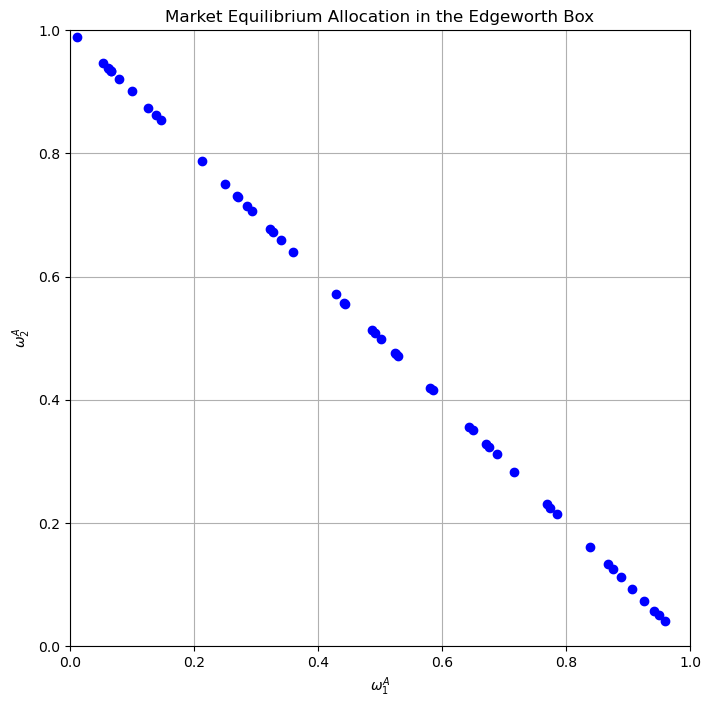

In [10]:
#Spørgsmål 8 
import numpy as np
import matplotlib.pyplot as plt

# Define the number of elements
num_elements = 50
# Generate a random set W with 50 elements where both omega_A1 and omega_A2 are drawn from a uniform distribution U(0,1)
omega_A1 = np.random.uniform(0, 1, num_elements)
omega_A2 = np.random.uniform(0, 1, num_elements)

# Create the set W as a collection of tuples (omega_A1, omega_A2)
W = list(zip(omega_A1, omega_A2))

# Assuming market equilibrium occurs when omega_A1 + omega_A2 = 1 for both goods
# This is just a placeholder; the actual market equilibrium would depend on the specific utility functions and other conditions
market_equilibrium = [(omega[0], 1 - omega[0]) for omega in W]

# Plot in the Edgeworth box
plt.figure(figsize=(8, 8))
for point in market_equilibrium:
    plt.plot(point[0], point[1], 'o', color='blue')
plt.title('Market Equilibrium Allocation in the Edgeworth Box')
plt.xlabel('$\omega^A_1$')
plt.ylabel('$\omega^A_2$')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.grid(True)
plt.show()